In [3]:
%%writefile sample.dot
digraph FST {
  rankdir=TB;
  fontsize=12;
  labelloc="t";
  label="Inverse normalisation: Exempelvis är 21 och 10 relativt prima";

  // States
  s0 [label="0", shape=circle];
  s1 [label="1", shape=circle];
  s2 [label="2", shape=circle];
  s3 [label="3", shape=circle];
  s4 [label="4", shape=circle];
  s5 [label="5", shape=circle];
  s6 [label="6", shape=circle];
  s7 [label="7", shape=doublecircle];

  // Fixed parts
  s0 -> s1 [label="Exempelvis:Exempelvis"];
  s1 -> s2 [label="är:är"];

  // 21 variants: (tjugo|tju|tjugi)(en|ett)
  s2 -> s3 [label="21:tjugoen"];
  s2 -> s3 [label="21:tjugoett"];
  s2 -> s3 [label="21:tjuen"];
  s2 -> s3 [label="21:tjuett"];
  s2 -> s3 [label="21:tjugien"];
  s2 -> s3 [label="21:tjugiett"];

  // och fixed
  s3 -> s4 [label="och:och"];

  // 10 variants: (tio|tie)
  s4 -> s5 [label="10:tio"];
  s4 -> s5 [label="10:tie"];

  // Fixed tail
  s5 -> s6 [label="relativt:relativt"];
  s6 -> s7 [label="prima:prima"];

  // Legend
  legend [shape=note, fontsize=10,
    label="Arc labels: INPUT:OUTPUT\n21 → (tjugo|tju|tjugi)(en|ett)\noch → och\n10 → (tio|tie)"];
  s0 -> legend [style=dashed, arrowhead=none];
}


Writing sample.dot


In [4]:
!dot -Tpng sample.dot -o sample.png

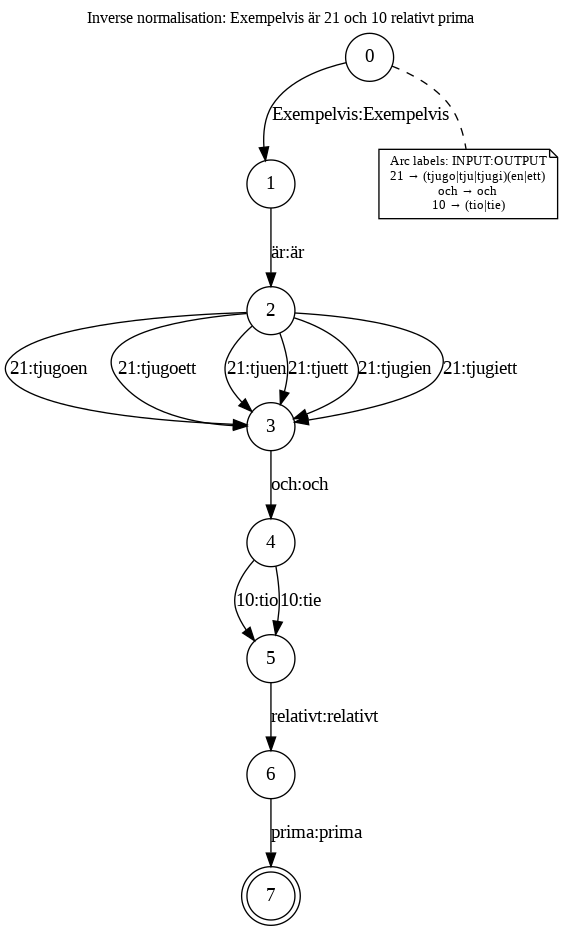

In [5]:
from IPython.display import Image
Image(filename='sample.png')